### Support Vector Machine(SVM)
- svm's are based on the idea of finding a hyperplane that best divides a dataset into two classes 
- It is applicable for both classification and regression models

<img src="svm.png" width=200 height=200>

### Hyperplane
- A hyperplane is a line that linearly separates and classifies a set of data 
### How to find Right Hyperplane
- The distance between the hyperplane and the nearest data point from either set is known as margin.
### SVM's goal
- To choose a hyperplane with greatest possible margin between the hyperplne and any point.

### SVM formula
#### Basic Formula
- Yi=b0+b1*Xi

### For all Xi values
- if Yi=-1:
    - b1*Xi + b0 <= -1 (Which belongs to negative class)
- if Yi=+1:
     - b1*Xi +b0 >= +1 (Which belongs to positive class)
     
### For all SVM data points which resides the margin
- b1*Xi + b0 = -1, here Xi is negative sv and Yi is -1
- b1*Xi + b0 = +1, here Xi is positive sv and Yi is +1

### Decision Boundary
- Yi*( b1*Xi+b0) = 0
### To maximize width(W)
- W=(('X+' - 'X-')*b1) / |b1|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets.samples_generator import make_blobs

In [3]:
X,Y=make_blobs(n_samples=500,centers=2,random_state=0,cluster_std=0.40)

In [4]:
X

array([[ 7.37744463e-01,  4.28276041e+00],
       [ 2.12883772e+00,  7.43467756e-01],
       [ 8.16490467e-01,  4.45180968e+00],
       [ 1.66935855e+00,  4.57758777e+00],
       [ 2.43954488e+00,  1.42928880e+00],
       [ 1.16152221e+00,  4.41542563e+00],
       [ 5.25539755e-01,  4.01151623e+00],
       [ 7.90831689e-01,  4.49637992e+00],
       [ 2.38339624e+00,  1.44164308e+00],
       [ 2.05475970e+00,  4.27421746e+00],
       [ 5.62572942e-01,  4.57642513e+00],
       [ 6.54906213e-01,  4.02796742e+00],
       [ 2.73913845e-01,  4.48416111e+00],
       [ 2.90198393e+00,  2.53312299e-01],
       [ 9.91722299e-01,  3.64110129e+00],
       [ 1.95845959e+00,  1.50496813e+00],
       [ 9.69997234e-01,  4.36815859e+00],
       [ 1.40229820e+00,  8.70809998e-01],
       [ 2.06369233e+00,  9.37445443e-01],
       [ 1.04293948e+00,  4.55779990e+00],
       [ 8.37105219e-01,  4.36632692e+00],
       [ 1.78818243e+00,  1.57043236e+00],
       [ 2.25474363e+00,  1.31685252e+00],
       [ 7.

In [5]:
Y

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

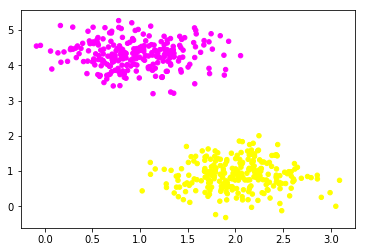

In [6]:
plt.scatter(X[:,0],X[:,1],c=Y,s=20,cmap='spring')#s can vary
plt.show()

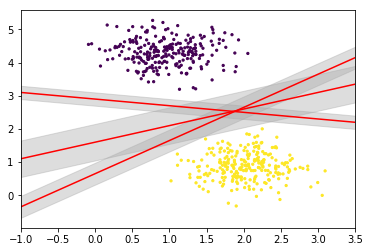

In [7]:
x1=np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=Y,s=5)#s can vary
for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    y1=m*x1+b
    plt.plot(x1,y1,c='red')
    plt.fill_between(x1,y1-d,y1+d,edgecolor='none',color='#AAAAAA',alpha=0.4)
plt.xlim(-1,3.5);
plt.show()
    

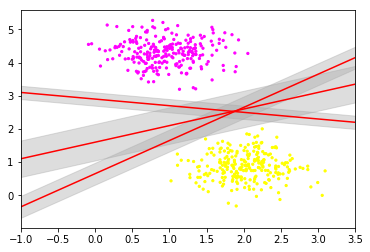

In [8]:
x1=np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=Y,s=5,cmap='spring')#s can vary
for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    y1=m*x1+b
    plt.plot(x1,y1,c='red')
    plt.fill_between(x1,y1-d,y1+d,color='#AAAAAA',alpha=0.4)
plt.xlim(-1,3.5);
plt.show()
    

In [9]:
data=pd.read_csv("Training.csv")
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
9,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [10]:
data.isnull().sum().sum()

0

In [11]:
data.shape

(4920, 133)

In [12]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
x=data.iloc[:,0:132]
y=data.iloc[:,-1]
x.shape

(4920, 132)

In [14]:
print(data.groupby('prognosis').size())
x.head(1)

prognosis
(vertigo) Paroymsal  Positional Vertigo    120
AIDS                                       120
Acne                                       120
Alcoholic hepatitis                        120
Allergy                                    120
Arthritis                                  120
Bronchial Asthma                           120
Cervical spondylosis                       120
Chicken pox                                120
Chronic cholestasis                        120
Common Cold                                120
Dengue                                     120
Diabetes                                   120
Dimorphic hemmorhoids(piles)               120
Drug Reaction                              120
Fungal infection                           120
GERD                                       120
Gastroenteritis                            120
Heart attack                               120
Hepatitis B                                120
Hepatitis C                                120
Hep

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
5                              Fungal infection
6                              Fungal infection
7                              Fungal infection
8                              Fungal infection
9                              Fungal infection
10                                      Allergy
11                                      Allergy
12                                      Allergy
13                                      Allergy
14                                      Allergy
15                                      Allergy
16                                      Allergy
17                                      Allergy
18                                      Allergy
19                                      Allergy
20                                      

In [16]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
data['prognosis']=le.fit_transform(data['prognosis'])
y.head(1)

0    Fungal infection
Name: prognosis, dtype: object

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
gnb=GaussianNB()
gnb.fit(x,y)
y_pre=gnb.predict(x)

In [20]:
y_pre

array(['Fungal infection', 'Fungal infection', 'Fungal infection', ...,
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype='<U39')

In [21]:
gnb.predict([[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array(['Urinary tract infection'], dtype='<U39')

In [22]:
x_test[:5]

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
2025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2213,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
a=ord('F')
while(ord('Z')>a):
    a+=1
    sum+=a
    if(sum==420):
        break          

TypeError: unsupported operand type(s) for +=: 'builtin_function_or_method' and 'int'

In [ ]:
ord('d')+ord('d')+ord('d')+ord("d")+ord('X')

In [ ]:
for i in range(ord('F'),ord('Q')):
    print(i)

In [ ]:
a=int('bbc',ord("\r"))
a

In [ ]:
ord("\r")

In [ ]:
chr(420)

In [ ]:
ord('Ƥ')

In [ ]:
ord('d')+ord('d')+ord('d')+ord('x')